# Exercice 1:

In [19]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1:

In [20]:
n=100

def partie(nb_simu):
    for i in range(nb_simu):
        x=0
        traj = [x]
        for j in range(n):
            rad = 2*np.random.binomial(1, 0.5)-1
            x += rad
            traj.append(x)
        plt.plot(range(n+1), traj)
        plt.xlabel('Position')
        plt.ylabel('Étape')
        plt.show()
        plt.clf()


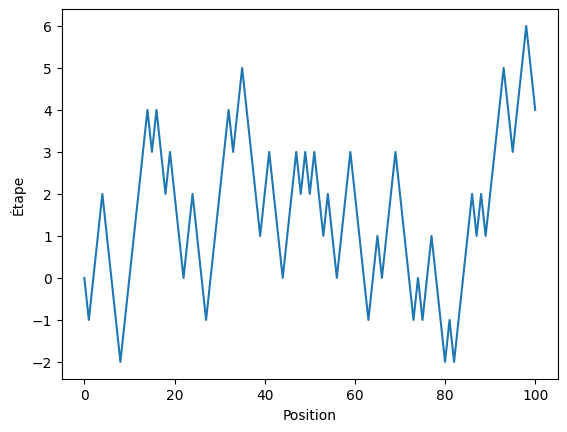

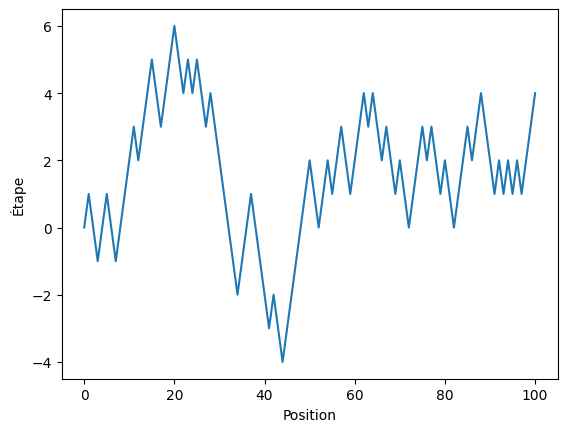

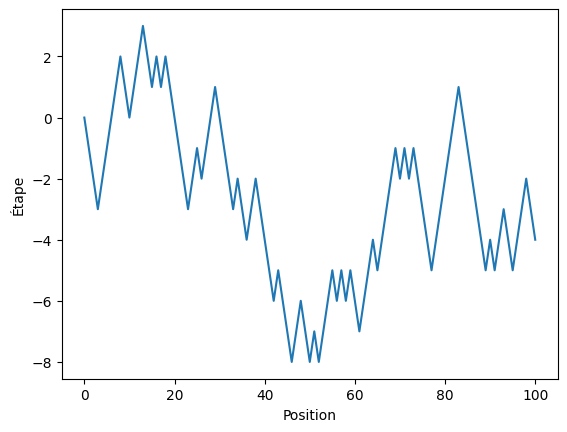

<Figure size 640x480 with 0 Axes>

In [21]:
#Illustration
partie(3)

### Question 4:

In [22]:
def monte_carlo_1(nb_simu, a, b):
    val_initial = 0
    val_fin = 0
    
    for i in range(nb_simu):
        val = val_initial
        for j in range(n):
            rad = 2 * np.random.binomial(1, 0.5) - 1 
            val += rad
            if val >= b:
                val_fin += 1
                break 
            elif val <= -a:
                break
    
    esp_val_fin = val_fin/nb_simu

    return esp_val_fin

In [23]:
# Paramètres simulation
nb_simu = 10000
a = 5
b = 5
proba_b_theorique = a/(a+b)

proba_b = monte_carlo_1(nb_simu, a,b)
print(f"Résultats de la simulation : {proba_b}")
print(f"Proba théorique: {proba_b_theorique}")

Résultats de la simulation : 0.4914
Proba théorique: 0.5


### Question 7:

In [24]:
def monte_carlo_2(nb_simu, a, b):
    T = []
    
    for i in range(nb_simu):
        val = 0
        t = 0
        
        while -a < val < b:
            rad = 2 * np.random.binomial(1, 0.5) - 1
            val += rad
            t += 1
        
        T.append(t)
    
    esp_T = np.mean(T)
    
    return esp_T

In [25]:
# Paramètres simulation
nb_simu = 100000
a = 2
b = 10
esp_T_theorique = a*b

esp_T = monte_carlo_2(nb_simu, a,b)
print(f"Simulation espérance de T : {esp_T}")
print(f"Espérance de T théorique: {esp_T_theorique}")

Simulation espérance de T : 20.14576
Espérance de T théorique: 20


# Exercice 2:

### Question 2:

In [60]:
def polya(a,b,n):
    proportion = [a/(a+b)] #Proportion de boules rouges par défaut
    for i in range(n):
        tirage = np.random.binomial(1, a/(a+b))
        if tirage == 1:
            a += 1
        else:
            b += 1
        proportion.append(a/(a+b))
    return proportion
    

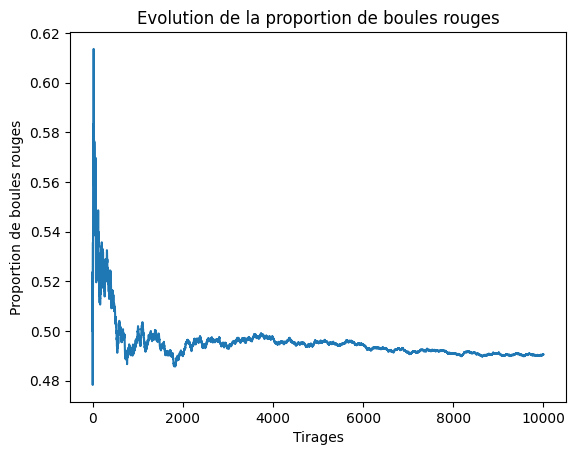

In [61]:
#Illustration

a = 10
b = 10
n = 10000

proportion = polya(a,b,n)

plt.xlabel('Tirages')
plt.ylabel('Proportion de boules rouges')
plt.title('Evolution de la proportion de boules rouges')
plt.plot(range(n+1),proportion)
plt.show()

### Question 3:

In [28]:
def polya_combi(combinations, n):
    plt.figure(figsize=(12, 8))
    
    for idx, (a, b) in enumerate(combinations):
        proportion = [a / (a + b)]  # Proportion de boules rouges initiale
        a_temp, b_temp = a, b  
        
        for i in range(n):
            tirage = np.random.binomial(1, a_temp / (a_temp + b_temp))
            if tirage == 1:
                a_temp += 1
            else:
                b_temp += 1
            proportion.append(a_temp / (a_temp + b_temp))
        
        #plt.subplot(len(combinations), 1, idx + 1)
        plt.plot(range(n + 1), proportion)
        plt.xlabel('Tirages')
        plt.ylabel('Proportion de boules rouges')
        plt.title('Evolution de la proportion de boules rouges')
    
    plt.show()

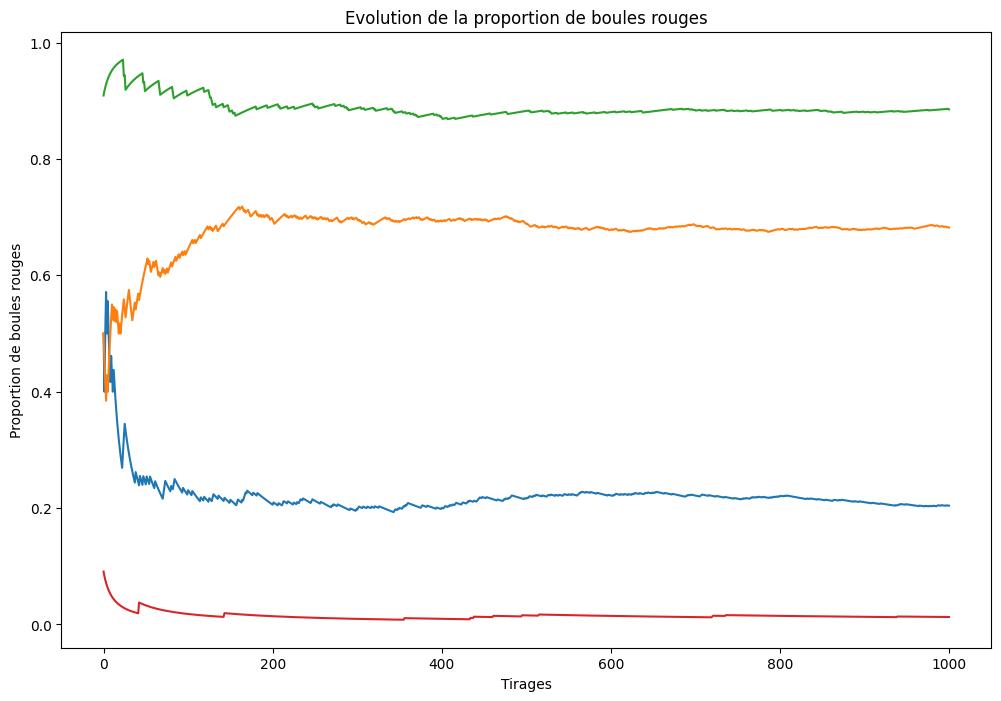

In [29]:
combinations = [(2, 2), (5, 5), (10, 1),(1,10)]
n = 1000

polya_combi(combinations, n)

### Question 4:

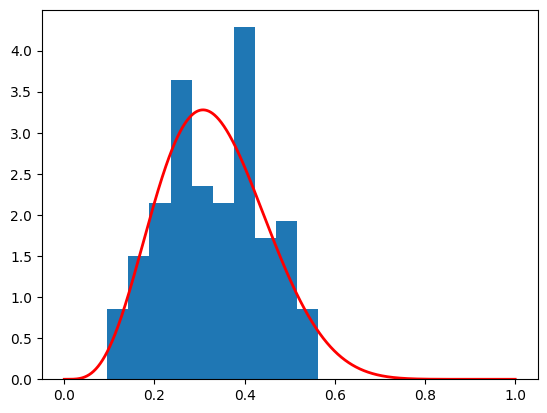

In [30]:
from scipy.stats import beta

K=100
n=1000

a=5
b=10

proportion_finale = []
for k in range(K):
    proportion = polya(a,b,n)
    proportion_finale.append(proportion[-1])


x = np.linspace(0,1,num=n)
densite_beta = beta.pdf(x, a, b)

plt.plot(x, densite_beta, 'r-', lw=2, label=f'Densité de la loi Bêta({a},{b})')
plt.hist(proportion_finale,bins=10,density=True)
plt.show()



### Question 5:

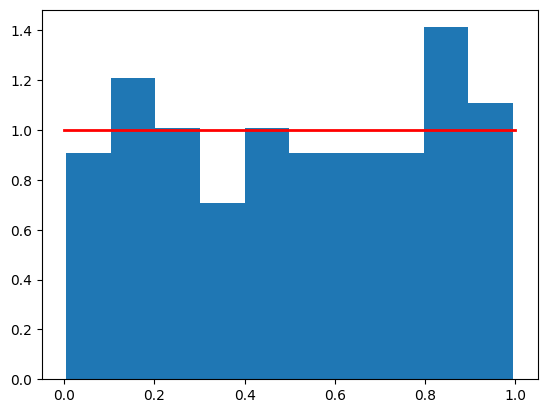

In [31]:
#Cas limite 
a=1
b=1

proportion_finale = []
for k in range(K):
    proportion = polya(a,b,n)
    proportion_finale.append(proportion[-1])


x = np.linspace(0,1,num=n)
densite_beta = beta.pdf(x, a, b)

plt.plot(x, densite_beta, 'r-', lw=2, label=f'Densité de la loi Bêta({a},{b})')
plt.hist(proportion_finale,bins=10,density=True)
plt.show()

Expression simple de la loi de bêta pour le cas limite A=B=1 : f(x,1,1)= 1

# Exercice 3:

### Question 1:

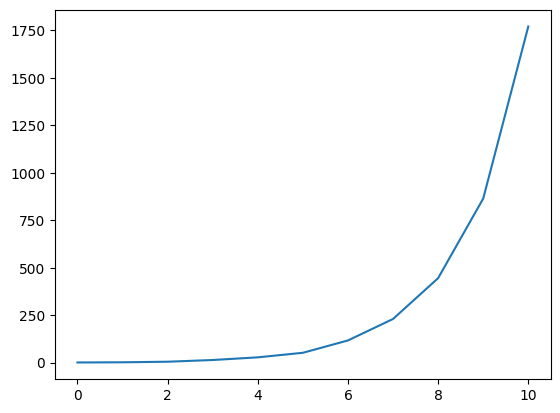

In [65]:
n = 10
lamb=2


#Loi de Poisson ; lambda = 2
def galton_watson_poisson(n,lamb):
    Z = [1]
    for i in range(n):
        next = 0
        for j in range(Z[-1]):
            next += np.random.poisson(2)
        Z.append(next)
    return Z

Z = galton_watson_poisson(n,lamb)
plt.plot(range(n+1), Z)
plt.show()
        


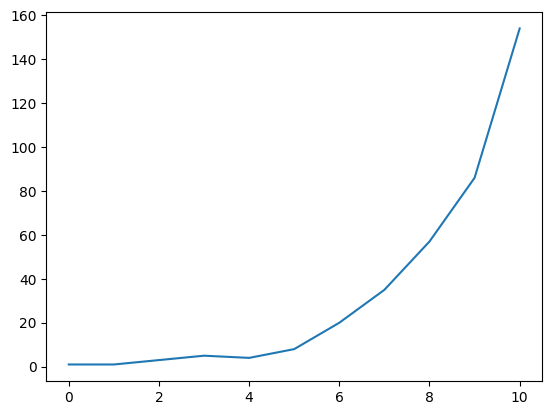

In [67]:
#Loi Normale ; mu = 2 ; sigma = 2

mu=2
sig=2

def galton_watson_normale(n,mu,sig):
    Z = [1]
    for i in range(n):
        next = 0
        for j in range(Z[-1]):
            next += int(np.random.normal(mu,sig))
        Z.append(next)
    return Z

Z= galton_watson_normale(n,mu,sig)
plt.plot(range(n+1), Z)
plt.show()

Conjecture : si mu <1, la taille de la population tend vers 0 ; si mu > 1, la taille de la population tend vers l'infini.

### Question 3:

D'après la question précédente, on sait que espérance de Zn vaut mu^n (voir feuille de réponse).

In [69]:
K= 1000
mu=2 #On a bien mu>1

liste_taille_pop = []
for k in range(K): #On réalise K simulations

    Z = [1]
    for i in range(n): #On regarde jusqu'à la génération n = 10
        next = 0
        for j in range(Z[-1]):
            next += np.random.poisson(mu)
        Z.append(next)
    liste_taille_pop.append(Z[-1])

esp_Zn = np.mean(liste_taille_pop)
esp_theorique_Zn = mu ** n

print(f"Espérance empirique de Zn: {esp_Zn}")
print(f"Espérance théorique de Zn: {esp_theorique_Zn}")

Espérance empirique de Zn: 1035.381
Espérance théorique de Zn: 1024


### Question: 5

Ici, on va tirer les Yn "conditionnellement à Yn != 0", ce qui veut dire que l'on ne predn en compte Yn dans la construction de notre vecteur que si il est non nul.

<function matplotlib.pyplot.show(close=None, block=None)>

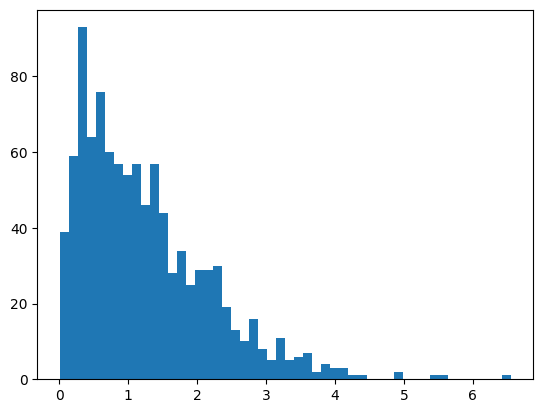

In [36]:
vector = [] #Vecteur que l'on va construire

while len(vector)<K:
    x = galton_watson_poisson(n,mu)[-1]/mu**n
    if x != 0: 
        vector.append(x)
plt.hist(vector, bins=50)
plt.show


    

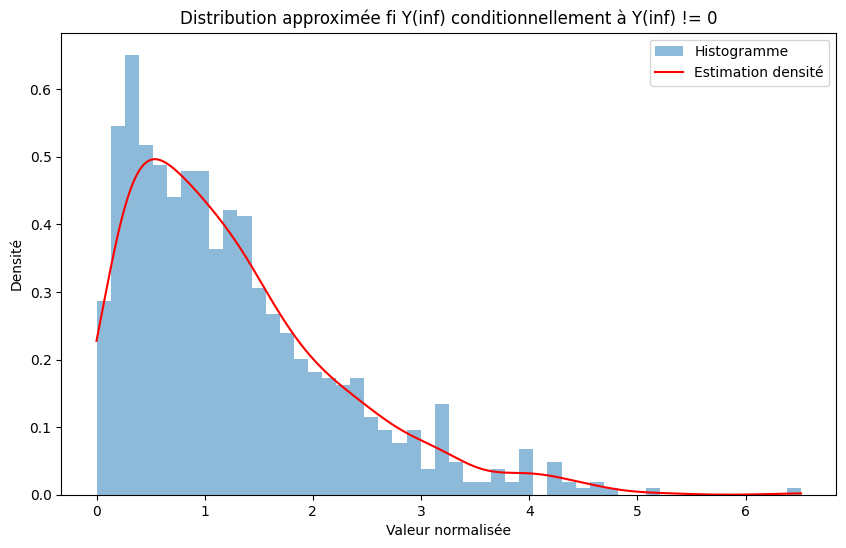

In [57]:
from scipy.stats import gaussian_kde

def galton_watson_poisson_normalise(K, n=10, lamb=2):
    normalized_values = []
    for _ in range(K):
        Z = galton_watson_poisson(n, lamb)
        if Z[-1] > 0:
            normalized_value = Z[-1] / (lamb ** n)
            normalized_values.append(normalized_value)
    return normalized_values


K = 1000
n = 10  
lamb = 2


normalized_values = galton_watson_poisson_normalise(K, n, lamb)


kde = gaussian_kde(normalized_values)
x = np.linspace(0, max(normalized_values), 1000)
kde_values = kde(x)


plt.figure(figsize=(10, 6))
plt.hist(normalized_values, bins=50, density=True, alpha=0.5, label='Histogramme')
plt.plot(x, kde_values, label='Estimation densité', color='red')
plt.xlabel('Valeur normalisée')
plt.ylabel('Densité')
plt.title('Distribution approximée fi Y(inf) conditionnellement à Y(inf) != 0')
plt.legend()
plt.show()
